<a href="https://colab.research.google.com/github/momoh127/EC414-MachineLearningWork/blob/main/EC414_HW6_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Homework 6: PCA Clustering

**Due date**: Wednesday, November 6th by 11:59pm

In [ ]:
import random
import numpy as np
from tqdm import tqdm

##Question 1: PCA

You are given a dataset in $\mathbb{R}^d$, $x_1,\dots,x_N$ that is already centered at zero: $\frac{1}{N}\sum_{i=1}^N x_i=0$. You calculate the covariance matrix:
$$\Sigma = \frac{1}{N}\sum_{i=1}^N x_ix_i^\top$$

The trace of this matrix is the "regular" variance of the data: $\sigma^2 = \frac{1}{N}\sum_{i=1}^N \|x_i\|^2$ (we do not need to subtract the mean because the mean is already zero). Suppose that you perform PCA onto the first $k$ principle components. Let the projected dataset in $\mathbb{R}^k$ be $x^{PCA}_1,\dots,x^{PCA}_N$.



```
# This is formatted as code
```

###Question 1.a (5 points)
Show that $\frac{1}{N} \sum_{i=1}^N x^{PCA}_i=0$.

ANSWER HERE

### Question 1.b (10 points)
Show that $\frac{1}{N} \sum_{i=1}^N \|x_i^{PCA}\|^2 \ge \frac{k}{d} \sigma^2$. Hints: (1) the trace of a symmetric matrix is equal to the sum of its eigenvalues. (2) It might help to show the following identity: if $v$ is a normalized eigenvector of $\Sigma$ with eigenvalue $\lambda$, then $\frac{1}{N}\sum_{i=1}^N  (v^\top x_i)^2 = \lambda$. To show this, you might want to also justify the fact that $v^\top \Sigma v=\lambda$.

ANSWER HERE

## PCA Example

There are no questions you need to answer in this section but please look through it to see an illustration of how PCA works.

PCA is a dimensionality reduction problem. We will work through a simple numerical example where we translate a 2-dimensional dataset to a 1-dimensional dataset by hand to get a feel for what is going on mathematically. In practice, this would be used for much larger dimensions, but for the sake of easy calculations and data visualization, we have kept the dimensions small.

Suppose you have the following dataset:

$$X = \begin{bmatrix}
  6 & -1 \\
  4 & -1 \\
  8 & 4 \\
  2 & -1     
\end{bmatrix}$$

**a.** Center the dataset and plot it. We will call this centered data matrix $\tilde{X}$.


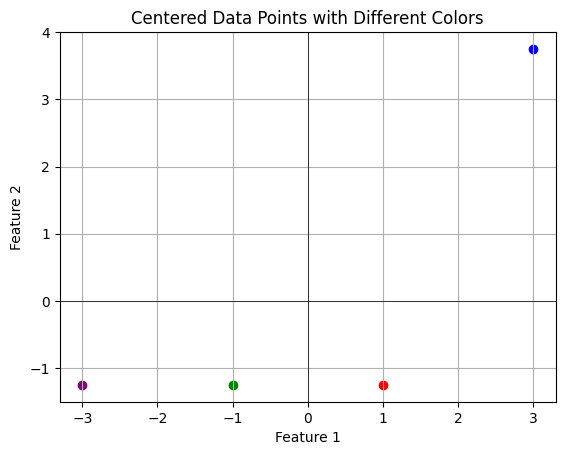

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Original dataset
X = np.array([[6, -1],
              [4, -1],
              [8, 4],
              [2, -1]])

# Mean of each feature
mu = np.mean(X, axis=0)

# Centered data matrix
X_tilde = X - mu

# Define colors for each data point
colors = ['red', 'green', 'blue', 'purple']

# Plot the centered data points with different colors
for i in range(len(X_tilde)):
    plt.scatter(X_tilde[i, 0], X_tilde[i, 1], color=colors[i])

plt.title('Centered Data Points with Different Colors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

**b.** Compute the covariance matrix of the data:

The data matrix is centered, so we just have $\Sigma = \frac{1}{n}\tilde{X}^T\tilde{X}$



In [ ]:
# Number of data points
n = X_tilde.shape[0]

# Compute covariance matrix
cov_matrix = (1/n) * np.dot(X_tilde.T, X_tilde)

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[5.     3.75  ]
 [3.75   4.6875]]


**c.** Calculate the eigenvalues and eigenvectors of the covariance matrix, making sure the eigenvectors are unit length. Then we plot the eigenvectors on the dataset.



Eigenvalues:
[8.5970038 1.0904962]

Eigenvectors:
[[ 0.72167532 -0.6922317 ]
 [ 0.6922317   0.72167532]]


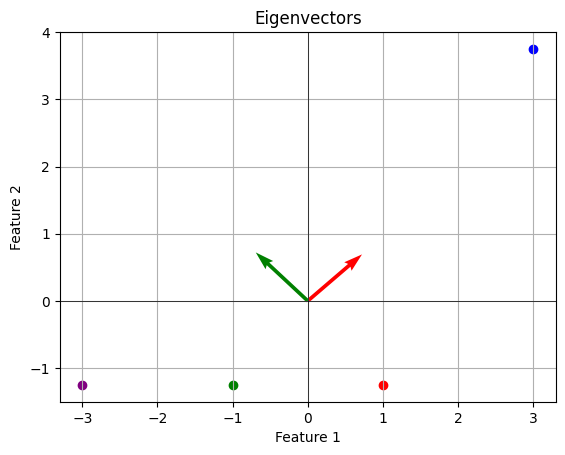

In [ ]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# Define colors for each data point
colors = ['red', 'green', 'blue', 'purple']

# Plot the centered data points with different colors
for i in range(len(X_tilde)):
    plt.scatter(X_tilde[i, 0], X_tilde[i, 1], color=colors[i])

# Plot eigenvectors with the same colors
for i in range(len(eigenvalues)):
    plt.quiver(0, 0, eigenvectors[0, i], eigenvectors[1, i], angles='xy', scale_units='xy', scale=1, color=colors[i])

plt.title('Eigenvectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

**d.** We pick k=1 eigenvalues and form a matrix of eigenvectors, C.


In [ ]:
# Chosen matrix of eigenvectors
C = np.array([[0.722],
              [0.692]])

# Compute Y
Y = np.dot(X_tilde, C)

print("Transformed Data Matrix Y:")
print(Y)

Transformed Data Matrix Y:
[[-0.143]
 [-1.587]
 [ 4.761]
 [-3.031]]




**e.** We finally transform the standardized data matrix with the matrix of eigenvectors and plot it. We plot it in one dimension (all x2 values are set to 0).


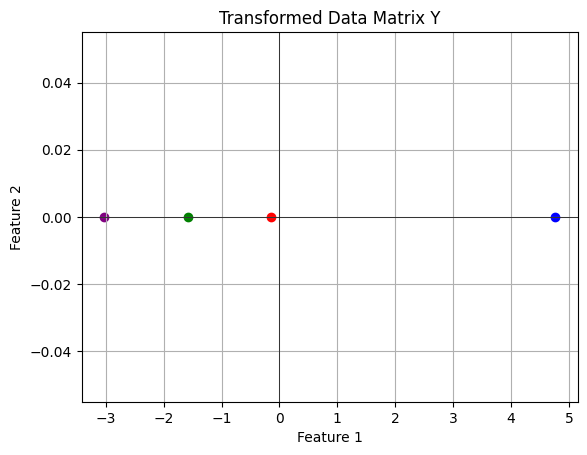

In [ ]:
# Define colors for each data point
colors = ['red', 'green', 'blue', 'purple']

# Plot transformed data in one dimension with the same colors as original data points
for i in range(len(Y)):
    plt.scatter(Y[i, 0], 0, color=colors[i])

plt.title('Transformed Data Matrix Y')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

###**Question 1**: K-means with Manhattan distance (20 pts)


In this exercise, we will explore how to generalize the **k-means** algorithm  in order to use distance measures other than the squared Euclidean distance studied in class.

k-means assigns data $\mathbf{x}_i \in \mathbb{R}^d$ into $k$ clusters by minimizing a cost function:
$$Cost(\mathbf{c}_1, \cdots, \mathbf{c}_k, y_1, \cdots, y_N) = \sum_{j=1}^{k} \sum_{i \in C_j} dist(\mathbf{x}_i, \mathbf{c}_{j}) \quad \quad \quad  (1)$$

where $y_i \in \{1, \cdots, k\}$ is the 'cluster label' to data $\mathbf{x}_i$, $C_j = \{i \in \{1, \cdots, N\}: y_i = j \}$ is an index set that keeps a record of which data have been assigned to cluster $j$, $dist(\cdot, \cdot)$ is a distant function, $\mathbf{c}_{j} \in \mathbb{R}^d$ is a **cluster representative** for cluster $j$. The minimization problem to equation (1) is NP-hard, so we need alternative heuristic to solve $\mathbf{c}_1, \cdots, \mathbf{c}_k, y_1, \cdots, y_N$ iteratively by repeating equation (2) and (3) until convergence.

We first find the cluster reprsentitives by:
$$\mathbf{c}_j = \underset{c}{\operatorname{argmin}} \sum_{{i} \in C_j} dist( \mathbf{x}_i, \mathbf{c}) \quad \forall j = \{1, \cdots, k\} \quad \quad \quad  (2)$$

Then we assign data $\mathbf{x}_i$ with cluster label $y_i$ by:
$$y_i = \underset{j}{\operatorname{argmin}} dist(\mathbf{x}_i, \mathbf{c}_j) \quad \forall i \in \{ 1, \cdots, N\} \quad \quad \quad  (3)$$

K-means by default considers euclidean distance that is $ dist(\mathbf{x}, \mathbf{c}) = \| \mathbf{x} - \mathbf{c} \|_2^2  $. In class, we derived the cluster representitive is cluster mean. Now, consider an alternative distance function Manhattan distance, that is

$$ dist(\mathbf{x}, \mathbf{c}) = \| \mathbf{x} - \mathbf{c} \|_1  $$

####1.a. (10 pts) Derive the cluster representitive when using Manhatan distance. (This is exactly identical to what we did in class when considering euclidean distance).  

**Answer here:**




####1.b. (5pts) Write down the pseudocode for the modified k-means algorithm with Manhattan distance. (This should be analogous to the original k-means algorithm done in class.)

**Answer here:**



####1.c. (5pts) State one potential advantage of using Manhattan distance over squared Euclidean distances for the purpose of clustering.

**Answer here:**


####1.d. (Bonus: 5 pts) Show that the modified k-means algorithm with Manhattan distance monotonically minimizes the objective function until local convergence (Hint: the convergence theorem for k-means algorithm discussed in class).

**Answer here:**
